#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [116]:
first_name= "Amirhossein"
last_name= "Akbari"
student_number= "99105901"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [117]:
import numpy as np
import pandas as pd

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [118]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


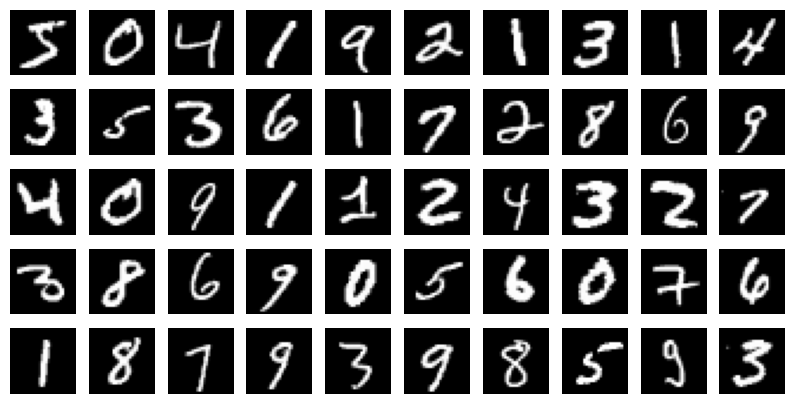

In [119]:
# here show 50 first of this images
import matplotlib.pyplot as plt
def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(5, 10, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Show the first 50 images from the dataset
show_images(50, x_train)

In [120]:
#TODO scale the data set to [0 1]
#divide data to maximum value .

x_train, x_test = x_train / np.max(x_train), x_test / np.max(x_test)


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [121]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

cov_x_train = np.cov(x_train, rowvar=False)
cov_x_test = np.cov(x_test, rowvar=False)

eigenvalues_train, eigenvectors_train = np.linalg.eigh(cov_x_train)
eigenvalues_test, eigenvectors_test = np.linalg.eigh(cov_x_test)

i1 = np.argsort(eigenvalues_train)[::-1]
eigenvalues_train = eigenvalues_train[i1]
eigenvectors_train = eigenvectors_train[:, i1]

i2 = np.argsort(eigenvalues_test)[::-1]
eigenvalues_test = eigenvalues_test[i2]
eigenvectors_test = eigenvectors_test[:, i2]

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [122]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.

var_train = np.sum(eigenvalues_train)
var_ratio = np.cumsum(eigenvalues_train) / var_train
k = np.argmax(var_ratio >= explained_variance) + 1

compression_ratio_train = x_train.shape[1] / k

print("Number of components to explain {} of variance: {}".format(explained_variance, k))
print("Compression ratio : {:.2f}".format(compression_ratio_train))


Number of components to explain 0.7 of variance: 26
Compression ratio : 30.15


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

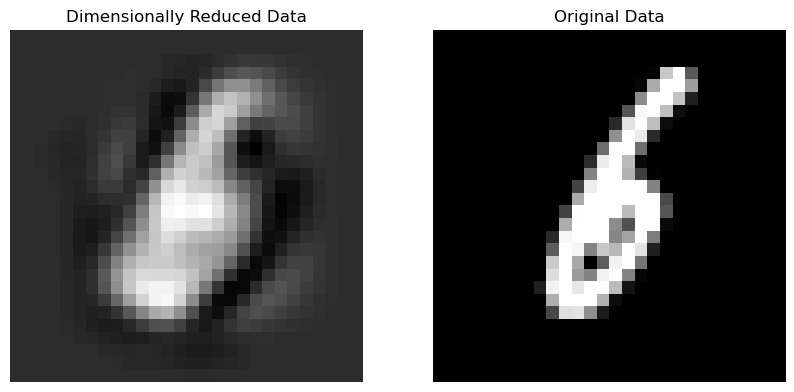

In [123]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
x_train_reduced = x_train @ eigenvectors_train[:, :k]

#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
x_train_reprojected = x_train_reduced @ eigenvectors_train[:, :k].T

#select on sample and reshape it to a 28 by 28 matrix and plot them as image
i = np.random.randint(0, len(x_train))
sample_reduced = x_train_reprojected[i, :]
sample_reduced = sample_reduced.reshape(28, 28)

sample_original = x_train[i, :]
sample_original = sample_original.reshape(28, 28)
#TODO
#plot the dimentionally reduced data
#plot the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_reduced, cmap='gray')
plt.title("Dimensionally Reduced Data")
plt.axis('off')

# Plot the original data
plt.subplot(1, 2, 2)
plt.imshow(sample_original, cmap='gray')
plt.title("Original Data")
plt.axis('off')

plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [124]:
#complete below function using python PCA function
def do_pca(n_components, data):
    X = data
    X = X.reshape(X.shape[0], -1)

    cov = np.cov(X, rowvar=False)

    eig_vals, eig_vecs = np.linalg.eigh(cov)

    i1 = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[i1]
    eig_vecs = eig_vecs[:, i1]

    X_reduced = X @ eig_vecs[:, :n_components]

    return X_reduced


In [125]:
from sklearn.neural_network import MLPClassifier
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    
    model = MLPClassifier(solver = 'lbfgs', max_iter=100)
    model.fit(X, y)
    score = model.score(X, y)
    if print_output:
        print(f"Accuracy: {score * 100:.2f}%")

    return score

In [128]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
import warnings
warnings.filterwarnings("ignore")

acc_list, pc_list = [], []
for pc in range(2,101):
    print(pc, end='')
    pc_list.append(pc)

    x_train_reduced = do_pca(pc, x_train)

    acc_list.append(ML_model(x_train_reduced, y_train, False))


23456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100

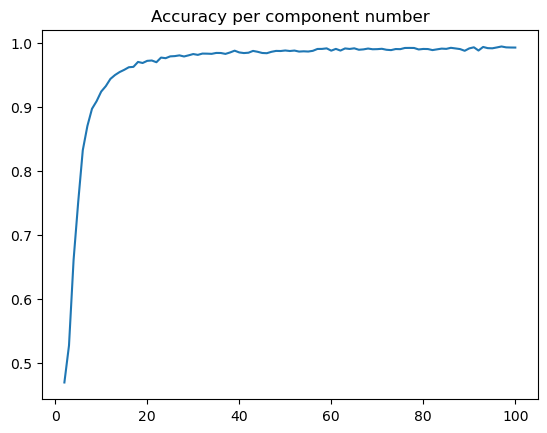

In [131]:
plt.plot(pc_list, acc_list)
plt.title("Accuracy per component number")

plt.show()

In [130]:
print(f'best num of components : {pc_list[acc_list.index(max(acc_list))]}')

best num of components : 97
